In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation
import numba

from molsim import dynamicHardDisks, staticHardDisks, hardDiskTrajectory

## Hard disks in a square

Consider a system of $N$ identical hard disks with diameter $1$ in a
square of size $10$. The use of periodic boundary conditions can be
switched on or off. The energy of this system ($U$) is either $U=0$ 
(no overlaps) or $U=\infty$ (at least one overlap). We would like to calculate the
radial distribution function of the disks ($g\left(r\right), \,\,r <
5$) in the canonical ensemble. There are 2 methods of calculating
this:
### 1. Dynamic scheme
The disks are initially placed on a lattice
and trial moves are performed to translate the disks. A trial move is
accepted when there are no overlaps and rejected when there are one or
more overlaps.
<div style="max-width:300px;margin-right: auto; margin-right: 0;">

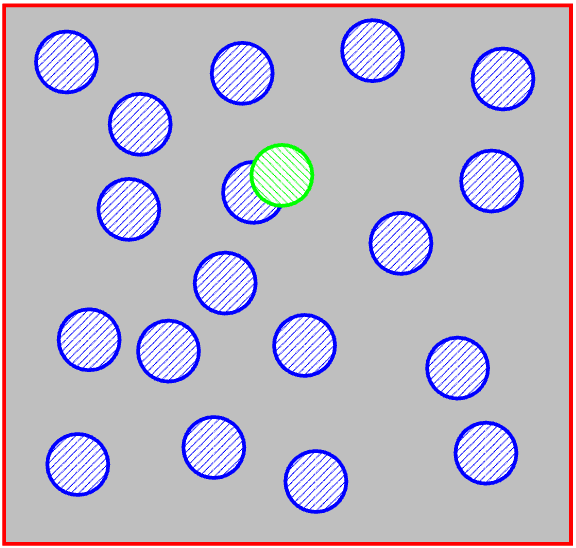
</div>


### 2. Static scheme
In every cycle, all disks are put at a
completely random position in the system. The radial distribution
function of this configuration is calculated and multiplied by the
Boltzmann factor of the system ($0$ when there is at least one overlap
and $1$ when there are no overlaps).
<div style="max-width:300px;margin-right: auto; margin-right: 0;">

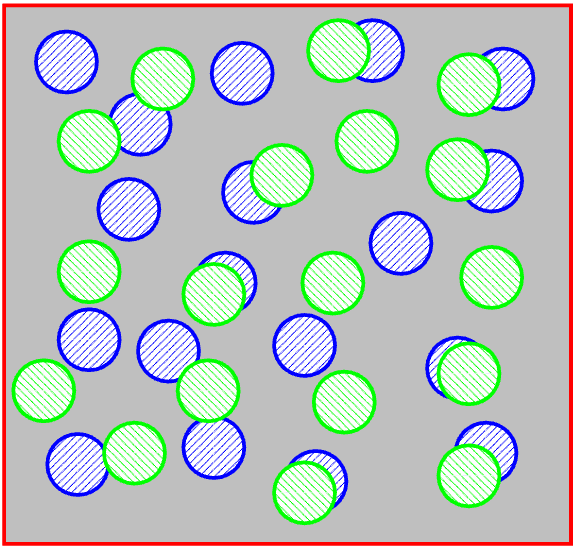
</div>

**Figures:** Eighteen hard disks in a box. The blue particles constitute the old system,
 the green particles the new system. The dynamic scheme performs a displacement trial move
 in one of the particles. The move is rejected when there is a overlap. The static scheme puts all
 particles at new random positions in the system. The move is accepted when there is no overlap.

### Question 1:
Below a python code is given in which both the Static ```staticHardDisks``` and ```dynamicHardDisks``` scheme are implemented. Finish the function ```checkOverlap``` both in the case with and without periodic boundary conditions. 
Periodic boundary conditions imply that the disks can overlap with the neighbouring images and perform a move to outside the box, this can not happen when periodic boundary conditions are turned off.

Run the static scheme for 1000 MC steps both with and without periodic boundary conditions.

In [ ]:
boxSize = 10.0
periodicBoundary = True
x, rdf, pIdx = dynamicHardDisks(
    numberOfInitCycles=int(1e6),
    numberOfProdCycles=int(1e5),
    numberOfParticles=64,
    maxDisplacement=0.5,
    sampleFrequency=1000,
    boxSize=boxSize,
    rdfBins=100,
    periodicBoundary=periodicBoundary,
)

In [ ]:
hardDiskTrajectory(x, None, boxSize, periodicBoundary=periodicBoundary, dynamic=True)

In [ ]:
n_frames = np.shape(x)[0]
n_particles = np.shape(x)[1]


# Function to compute periodic offsets
def get_periodic_offsets(boxSize):
    return [
        np.array([0, 0]),  # Original position
        np.array([boxSize, 0]),  # Right
        np.array([-boxSize, 0]),  # Left
        np.array([0, boxSize]),  # Up
        np.array([0, -boxSize]),  # Down
        np.array([boxSize, boxSize]),  # Top-right
        np.array([-boxSize, boxSize]),  # Top-left
        np.array([boxSize, -boxSize]),  # Bottom-right
        np.array([-boxSize, -boxSize]),  # Bottom-left
    ]


# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-0.25 * boxSize, boxSize * 1.25)
ax.set_ylim(-0.25 * boxSize, boxSize * 1.25)
ax.axhline(0)
ax.axhline(boxSize)
ax.axvline(0)
ax.axvline(boxSize)
ax.set_aspect("equal")

# Pre-compute offsets for periodic images
if periodic_boundary_conditions:
    offsets = get_periodic_offsets(boxSize)
else:
    offsets = [np.array([0, 0])]
n_offsets = len(offsets)
# Pre-create all Circle objects
circle_patches = []
for _ in range(n_particles * n_offsets):  # Total number of circles
    circle = Circle((0, 0), 0.5, edgecolor="blue", fill=False)
    circle_patches.append(circle)
    ax.add_patch(circle)

# Update function for the animation
dynamic = True


def update(frame):
    positions = x[frame] % boxSize  # Get positions for the current frame
    modifiedIdx = [int(pIdx[frame, 0]) * len(offsets) + i for i in range(len(offsets))]
    index = 0
    for position in positions:
        for offset in offsets:
            circle_patches[index].center = position + offset
            if dynamic:
                if index in modifiedIdx:
                    circle_patches[index].set_edgecolor("red")
                    if pIdx[frame, 1]:
                        circle_patches[index].set_fill(True)
                else:
                    circle_patches[index].set_edgecolor("blue")
                    circle_patches[index].set_fill(False)

            index += 1


# Create the animation
ani = FuncAnimation(fig, update, frames=n_frames, repeat=True)

# Display the animation inline in Jupyter Notebook
from IPython.display import HTML

HTML(ani.to_jshtml())

### Question 2:
Write a program to calculate $g\left(r\right)$. Once the radial distribution function is implemented, it can be used for both methods. 
Make sure that both methods give the same result when $N$ is small. 

### Question 2:
At which N does the second method starts to fail? Why?

### Question 3:
For which method will there be a larger correlation between
successive elements of the Markov chain? Explain.

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.0, 0.5 * boxSize, 100), rdf)

In [ ]:
boxSize = 20.0
x, rdf = staticHardDisks(
    numberOfInitCycles=int(1e6),
    numberOfProdCycles=int(1e5),
    numberOfParticles=6,
    maxDisplacement=0.2,
    sampleFrequency=5000,
    boxSize=boxSize,
    rdfBins=100,
    pbc=False,
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation

n_frames = np.shape(x)[0]
n_particles = np.shape(x)[1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, boxSize)
ax.set_ylim(0, boxSize)
ax.set_aspect("equal")
# Pre-compute offsets for periodic images
offsets = get_periodic_offsets(boxSize)
n_offsets = len(offsets)

# Pre-create all Circle objects
circle_patches = []
for _ in range(n_particles * n_offsets):  # Total number of circles
    circle = Circle((0, 0), 0.5, edgecolor="blue", fill=False)
    circle_patches.append(circle)
    ax.add_patch(circle)
# Create the animation
dynamic = False
ani = FuncAnimation(fig, update, frames=n_frames, repeat=True)

# Display the animation inline in Jupyter Notebook
from IPython.display import HTML

HTML(ani.to_jshtml())

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
# ax.scatter(*x[-1].T % boxSize, s=1200)
plusX = np.array([boxSize, 0])
plusY = np.array([0, boxSize])

for pos in x[-1]:
    ax.add_patch(plt.Circle(pos, 0.5, edgecolor="blue", fill=False))
    ax.add_patch(plt.Circle(pos + plusX, 0.5, edgecolor="blue", fill=False))
    ax.add_patch(plt.Circle(pos - plusX, 0.5, edgecolor="blue", fill=False))
    ax.add_patch(plt.Circle(pos, 0.5, edgecolor="blue", fill=False))
    ax.add_patch(plt.Circle(pos + plusY, 0.5, edgecolor="blue", fill=False))
    ax.add_patch(plt.Circle(pos - plusY, 0.5, edgecolor="blue", fill=False))
ax.set_xlim(0, boxSize)
ax.set_ylim(0, boxSize)